# Step 0: Import libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nltk # nltk library docs: https://www.nltk.org/install.html
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
from wordcloud import WordCloud # https://github.com/amueller/word_cloud

[nltk_data] Downloading package punkt to /home/teo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/teo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 1: Read and prepare the text.

* We have to open the text file we are working with to prepare it for further analysis.

In [2]:
file = open("meditations_marcus_aurelius.txt", encoding = "UTF-8")
raw_meditations = file.read().lower() # Lowercase all the text for better analysis.

* Using nltk functions we process the text for further analysis.

In [56]:
tokenizer = RegexpTokenizer(r'\w+') # With this regex we can omit punctuation.
tokens_meditations = tokenizer.tokenize(raw_meditations) # Separate text into tokens (words).
stop_words = set(stopwords.words("english")) # Language of the stopwords we want to omit.

excluded_words = ['things', 'thou', 'unto', 'thy', 'either', 'also', 'thing', 'yet', 'thee'] # Some words that I want to exclude

words_filtered = []

for w in tokens_meditations:
    if w not in stop_words and w not in excluded_words:
        words_filtered.append(w)
        
text_meditations = nltk.Text(words_filtered) # Searchable version of the text.


# Step 2: Analysis of the text. 

* How many words the filtered text has.


In [57]:
len(text_meditations)

30990

* How many times the word desired appears on the text.(case-sensitive)


In [58]:
text_meditations.count("virtue")

30

*  Frequency of appearance

In [59]:
freq_dist = nltk.FreqDist(text_meditations)
freq_dist.most_common(20) # Most common 20 words.

[('man', 368),
 ('one', 336),
 ('nature', 273),
 ('doth', 253),
 ('good', 216),
 ('thyself', 197),
 ('must', 193),
 ('whatsoever', 172),
 ('life', 166),
 ('shall', 163),
 ('world', 160),
 ('upon', 152),
 ('mind', 150),
 ('may', 146),
 ('men', 145),
 ('many', 143),
 ('time', 142),
 ('hath', 138),
 ('part', 124),
 ('anything', 122)]

* A dispersion plot to visualize the frequency of appearance.

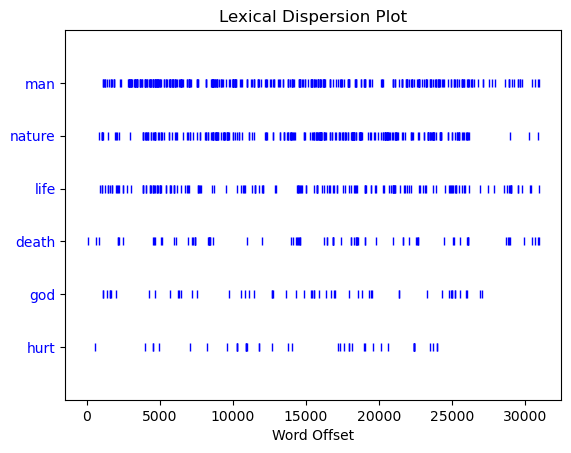

In [60]:
text_meditations.dispersion_plot(["man", "nature", "life", "death", "god", "hurt"])

* Text collocations

In [61]:
text_meditations.collocation_list()

[('must', 'needs'),
 ('one', 'another'),
 ('according', 'nature'),
 ('nature', 'universe'),
 ('marcus', 'aurelius'),
 ('antoninus', 'pius'),
 ('every', 'one'),
 ('doth', 'happen'),
 ('reasonable', 'creatures'),
 ('minds', 'understandings'),
 ('well', 'pleased'),
 ('fancies', 'imaginations'),
 ('take', 'heed'),
 ('natural', 'constitution'),
 ('doth', 'consist'),
 ('divine', 'providence'),
 ('call', 'mind'),
 ('dead', 'gone'),
 ('lot', 'portion'),
 ('conceit', 'opinion')]

* The lines where the word searched appears.

In [62]:
# Gives insight of the context.
text_meditations.concordance("man")

Displaying 25 of 368 matches:
ations legends myths allegorical soul man thus emanation godhead eventually abs
together good good whole highest good man consciously work god common good sens
 rules universe virtue soul must rule man logic stoic system noteworthy theory 
rely sphere virtue may act ideal wise man sufficient αὐταρκής knowing truths ha
upon rack probable stoic claimed wise man strove ideal much christian strives l
oint strong insistence unity universe man duty part great whole public spirit s
_imitation christ_ ideal self control man task says _imitation_ overcome every 
a meet us _meditations_ alike realise man one great community man sufficient sa
alike realise man one great community man sufficient says christian must bear t
e upon earth says christian evil days man life passeth away suddenly shadow one
 serve divine spirit implanted within man must keep pure violent passion evil a
ourtesy consideration aims whatsoever man doth saith must good doth man offend 
tsoever ma

* Similar words to the one analysed

In [63]:
text_meditations.similar("man")

nature little universe one good natural bad wise proper doth kind
naturally brought long much many die operations world gods


* Most common words used with the words from the lists.


In [64]:
text_meditations.common_contexts(['man', 'nature'])
text_meditations.common_contexts(["life", "death"])
text_meditations.common_contexts(["god", "hurt"])

nature_doth man_doth constitution_man man_man
No common contexts were found
No common contexts were found


* We can create a wordcloud with the text analysed.

In [65]:
# A .txt file created with filtered text
with open('filtered_meditations.txt', 'w') as f:
    for line in text_meditations:
        f.write(f"{line} ")

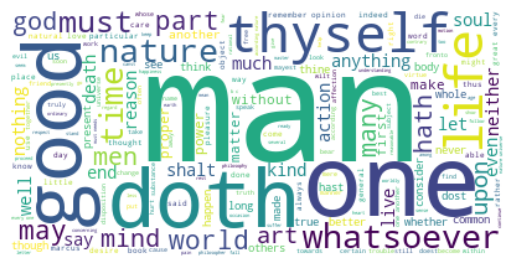

In [67]:
# with the new .txt file we can make a wordcloud for more visual appealing visualization of the frequency of the words used.
wordcloud_text = open('filtered_meditations.txt').read()

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(wordcloud_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* We can use a mask to create the wordcloud

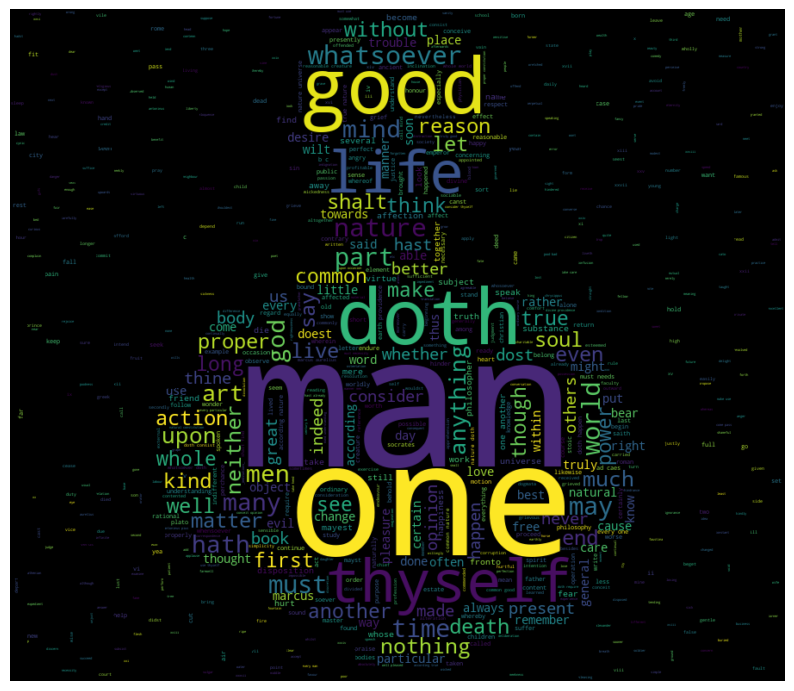

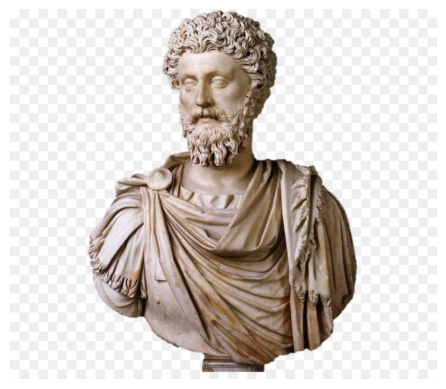

In [68]:
# read the mask image
marcus_aurelius_mask = np.array(Image.open("marcus_aurelius.jpg"))

# generate word cloud
wc = WordCloud(background_color="black", max_words=2000, mask=marcus_aurelius_mask,
               contour_width=3, contour_color='black').generate(wordcloud_text)

# store to file
wc.to_file("marcus.png")

# show
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# image used as mask
plt.figure()
plt.imshow(marcus_aurelius_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.show()